In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [3]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [4]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [5]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [6]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from tensorflow.keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))


In [7]:
# - Calculate and report the mean review size, its standard deviation and create a boxplot.

In [8]:
result = [len(x_data) for x_data in data] 
print(result)


[31, 26, 9, 24, 11, 40, 28, 38, 47, 23, 23, 5, 36, 25, 27, 20, 33, 35, 8, 11, 21, 40, 35, 18, 9, 16, 15, 12, 30, 32, 48, 18, 32, 31, 36, 20, 16, 34, 28, 18, 19, 22, 36, 21, 27, 13, 31, 47, 27, 42, 23, 13, 30, 33, 20, 11, 40, 24, 9, 14, 24, 18, 43, 25, 20, 32, 14, 31, 15, 13, 21, 11, 37, 20, 30, 18, 19, 14, 17, 46, 9, 19, 22, 14, 35, 36, 29, 8, 46, 37, 28, 23, 20, 29, 17, 13, 30, 44, 27, 38, 9, 38, 26, 48, 25, 21, 25, 9, 38, 27, 14, 40, 28, 42, 23, 14, 19, 39, 12, 25, 30, 11, 32, 39, 16, 16, 13, 20, 13, 20, 23, 14, 12, 40, 21, 35, 9, 10, 34, 17, 19, 27, 25, 33, 16, 26, 12, 9, 20, 19, 40, 30, 8, 15, 44, 34, 26, 17, 19, 39, 23, 16, 10, 14, 18, 34, 35, 30, 48, 38, 20, 17, 23, 4, 25, 30, 14, 13, 12, 18, 35, 35, 36, 47, 21, 12, 25, 19, 13, 28, 36, 7, 21, 25, 13, 28, 39, 19, 30, 23, 29, 10, 26, 9, 27, 31, 7, 47, 19, 15, 15, 12, 29, 7, 38, 33, 31, 14, 14, 21, 27, 35, 13, 18, 17, 29, 4, 30, 19, 9, 10, 17, 24, 20, 43, 11, 31, 25, 9, 26, 18, 24, 24, 26, 25, 31, 24, 11, 33, 9, 15, 9, 44, 29, 5, 36

In [9]:
#The mean value. 
r_m = np.mean(result)
print(r_m)


24.676519799219186


In [10]:
#The std value.
r_std = np.std(result)
print(r_std)

11.28405192884278


C:\Users\korina Mokati\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


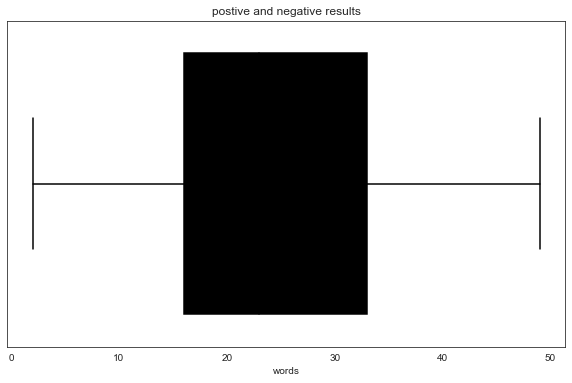

In [11]:
sb.set_style("white")
plt.figure(figsize = (10,6))
sb.boxplot(result,color="black")
plt.title("postive and negative results")
plt.xlabel("words")
plt.show()

In [12]:
# Number of pos/neg samples in your training set
print(np.unique(result, return_counts=True))


(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), array([ 2,  9, 11, 11, 10, 19, 29, 42, 42, 40, 45, 59, 58, 45, 56, 61, 71,
       61, 76, 57, 54, 54, 48, 66, 44, 46, 41, 42, 63, 43, 35, 27, 39, 37,
       30, 23, 31, 27, 27, 22, 28, 24, 29, 24, 26, 20, 23, 16],
      dtype=int64))


In [13]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


In [14]:
# - Calculate the number of unique words in the dataset
#words = 5000
from keras.preprocessing.sequence import pad_sequences
X = pad_sequences(tokenized_data,padding='post',maxlen=4)
print(X)
y = labels
#data_train, label_train, data_test,label_test = data(num_words=top_words, skip_top=50, seed=113, start_char=1, oov_char=2)

[[18  4  2 19]
 [ 2  4  2  0]
 [ 0  0  0  0]
 ...
 [ 0  0  0  0]
 [ 6  0  0  0]
 [ 0  0  0  0]]


In [15]:
import tensorflow as tf

In [16]:
sequence = [[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]
tf.keras.preprocessing.sequence.pad_sequences(sequence)

array([[18,  4,  2, 19],
       [ 0,  2,  4,  2],
       [ 0,  0,  0,  0],
       [ 0,  0,  6,  4],
       [ 0,  1, 12,  3]])

In [17]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, value=-1)


array([[18,  4,  2, 19],
       [-1,  2,  4,  2],
       [-1, -1, -1, -1],
       [-1, -1,  6,  4],
       [-1,  1, 12,  3]])

In [18]:
 tf.keras.preprocessing.sequence.pad_sequences(sequence, padding='post')

array([[18,  4,  2, 19],
       [ 2,  4,  2,  0],
       [ 0,  0,  0,  0],
       [ 6,  4,  0,  0],
       [ 1, 12,  3,  0]])

In [19]:
tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=2)

array([[ 2, 19],
       [ 4,  2],
       [ 0,  0],
       [ 6,  4],
       [12,  3]])

In [20]:
#X_train,X_test,y_train,y_test=train_test_split(y,X,test_size=0.2, shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(X, 
                y, test_size=0.2, shuffle=True)


In [21]:
print(X_train.shape,y_train.shape)



(1434, 4) (1434, 2)


In [22]:
data
print(data)
X = data

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource', 'eye opening information', 'a gem', 'the best book on money ive ever read', 'funny sexy sweet poignant', 'one of koontzs better books', 'absolutely fantastic', 'possible side effects a burroughs', 'a dream a vision the west incarnate', 'loved it', 'as expected', 'a good writer suffers', 'how many terrorists can walk a tightrope', 'interesting good info odd storyline', 'ruth can do better', 'excellent', 'i love this book', 'quite enjoyable', 'sound advice', 'the struggle of faith and duty', 'made my ordinary day much better', 'go ahead have another onewhats one more gonna do', 'retro yet relevant', 'i dont think it sounds like mice', 'make this your first investment', 'a tra

In [23]:
labels
print(labels)
y = labels

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [24]:
#from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [25]:
def assess_model(model,data_test, label_test):
    #y_classes = model.predict_classes(data_test, verbose = 0)
    #metrics = confusion_metrics(y_classes, label_test)
    #print(metrics)
    LogisticRegression = model()
    LogisticRegression.fit(data_test, to_class(label_test))
    y_pred = LogisticRegression.predict(X_test).reshape(-1,1)
    print(precision_score(to_class(y_test),y_pred))
    print(recall_score(to_class(y_test),y_pred))
    print(f1_score(to_class(y_test),y_pred))
    print(confusion_matrix(to_class(y_test),y_pred))
    
assess_model(LogisticRegression, X_train,y_train)

0.5263157894736842
0.7103825136612022
0.6046511627906976
[[ 59 117]
 [ 53 130]]


In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(tokenized_data, maxlen=200)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
embedding_vector_length = 32
model = Sequential()
#(1434, 4) (1434, 2)
model.add(Embedding(input_dim=1435, output_dim=100, input_length=4))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(32))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            143500    
                                                                 
 spatial_dropout1d (SpatialD  (None, 4, 100)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 32)                17024     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 160,590
Trainable params: 160,590
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
history =model.fit(X_train, y_train, validation_split=0.2, epochs =25, batch_size= 10)

Epoch 1/25
115/115 [==============================] - 5s 15ms/step - loss: 0.6928 - accuracy: 0.5083 - val_loss: 0.6833 - val_accuracy: 0.5610
Epoch 2/25
115/115 [==============================] - 1s 7ms/step - loss: 0.6767 - accuracy: 0.5554 - val_loss: 0.6375 - val_accuracy: 0.6690
Epoch 3/25
115/115 [==============================] - 1s 8ms/step - loss: 0.6525 - accuracy: 0.6042 - val_loss: 0.6351 - val_accuracy: 0.6272
Epoch 4/25
115/115 [==============================] - 1s 7ms/step - loss: 0.6478 - accuracy: 0.5963 - val_loss: 0.6316 - val_accuracy: 0.6341
Epoch 5/25
115/115 [==============================] - 1s 8ms/step - loss: 0.6445 - accuracy: 0.5990 - val_loss: 0.6291 - val_accuracy: 0.6411
Epoch 6/25
115/115 [==============================] - 1s 8ms/step - loss: 0.6389 - accuracy: 0.6181 - val_loss: 0.6402 - val_accuracy: 0.6690
Epoch 7/25
115/115 [==============================] - 1s 8ms/step - loss: 0.6399 - accuracy: 0.5955 - val_loss: 0.6311 - val_accuracy: 0.6376
Epoch

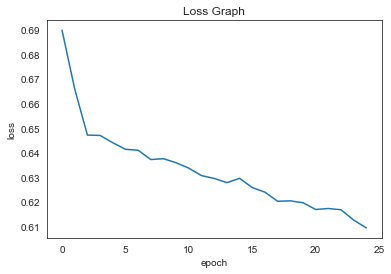

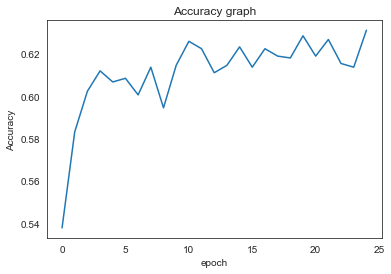

<Figure size 432x288 with 0 Axes>

In [36]:
#plotting the Loss and Accuracy graphs.

plt.plot(history.history['loss'])
plt.title('Loss Graph')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()
plt.plot(history.history['accuracy'])
plt.title('Accuracy graph')
plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.show()
plt.savefig("Loss plt")